In [37]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from ipywidgets import widgets

data = pd.read_csv('apple_quality.csv')
X = data.drop(columns=['Quality', 'A_id'])
y = data ['Quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

model = DecisionTreeClassifier()
model.fit(X, y)
pre = model.predict(X_test)
score = accuracy_score(y_test, pre)
score


1.0

In [38]:
model.fit(X.values, y)

# The text boxes where the user can input values.
size = widgets.IntSlider(description='Size:', value=0, min=-7, max=7)
weight = widgets.IntSlider(description='Weight:',  value=0, min=-7, max=7)
sweetness = widgets.IntSlider(description='Sweetness:', value=0, min=-7, max=7)
crunch = widgets.IntSlider(description='Crunch:', value=0,  min=-7, max=7)
juice = widgets.IntSlider(description='Juice:', value=0, min=-7, max=7)
ripe = widgets.IntSlider(description='Ripe:', value=0, min=-7, max=7)
acid = widgets.IntSlider(description='Acid:', value=0, min=-7, max=7)

# A button for the user to get predictions using input values.
button_predict = widgets.Button(description='Quality')
button_output = widgets.Label(value='Enter values and press the "Quality" button.')

# Defines what happens when you click the button.
def on_click_predict(b):
    prediction = model.predict([[
        size.value, weight.value, sweetness.value, crunch.value, juice.value, ripe.value, acid.value]])
    button_output.value = 'Quality = ' + str(prediction[0])

button_predict.on_click(on_click_predict)

# Displays the text boxes and buttons inside a VBox.
vb = widgets.VBox([size, weight, sweetness, crunch, juice, ripe, acid, button_predict, button_output])
print('\033[1m' + 'Enter values for prediction' + '\033[0m')
display(vb)


Enter values for prediction


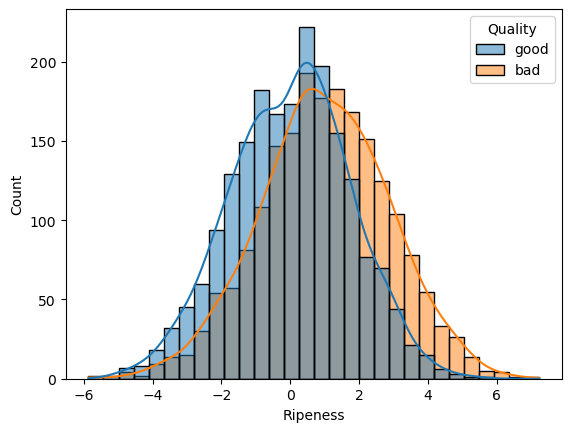

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data, x='Ripeness', hue='Quality', kde=True, bins =30);

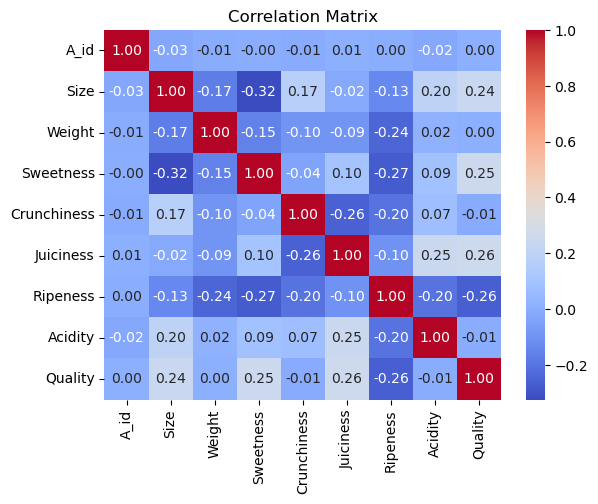

In [40]:
# Assuming 'Quality' is the column with non-numeric values
# You may need to modify this based on your actual column names
label_encoder = LabelEncoder()
data['Quality'] = label_encoder.fit_transform(data['Quality'])

# Calculate correlation
corr_data = data.corr()

# Plot correlation matrix using seaborn
sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

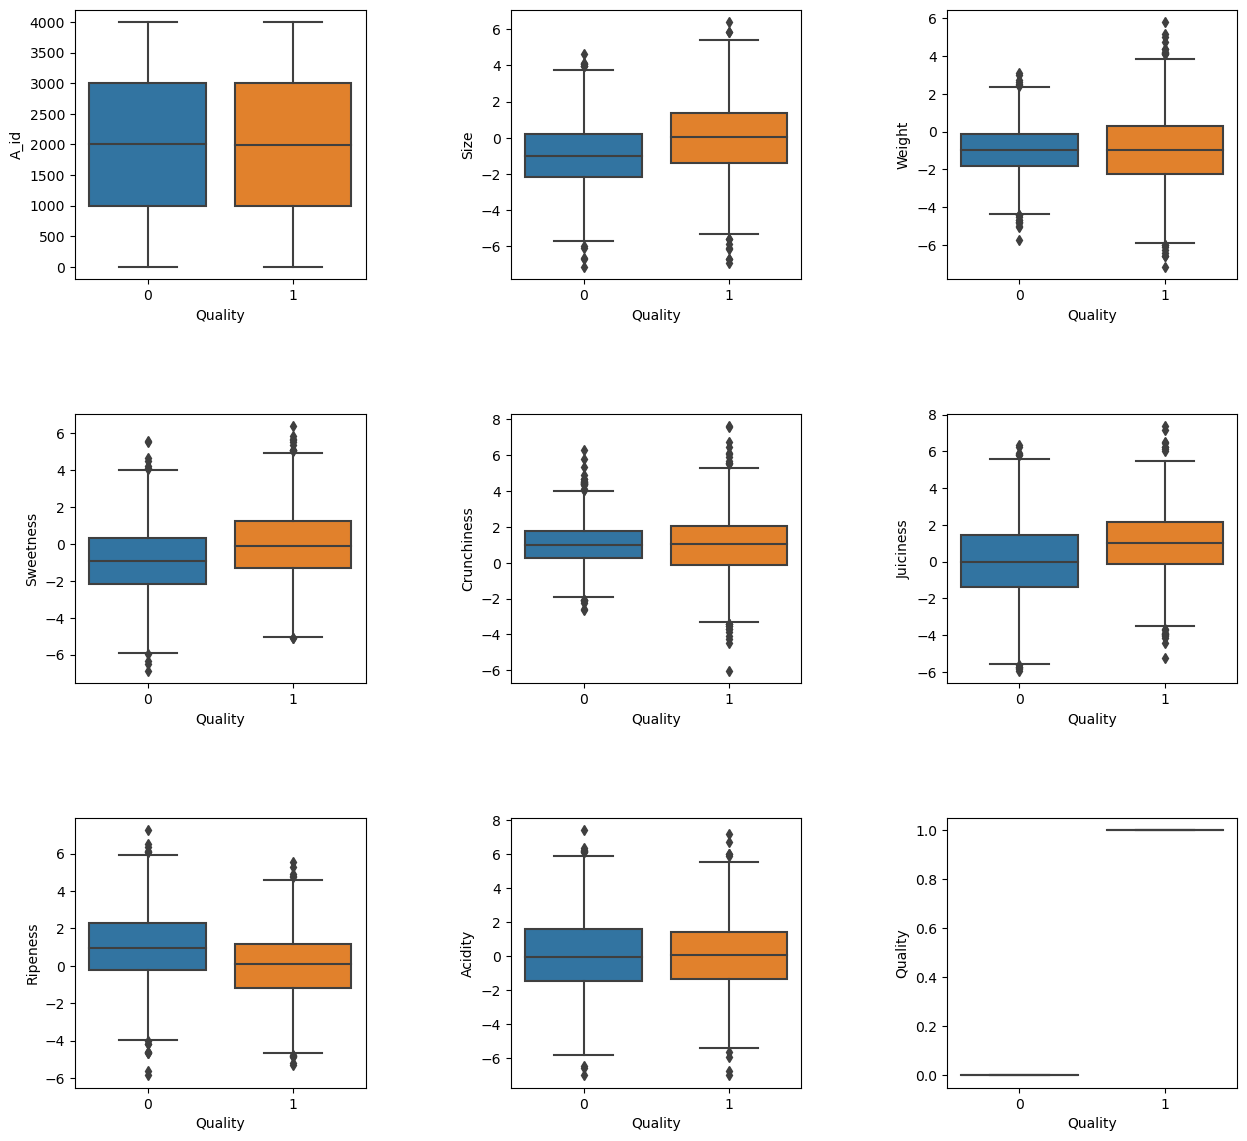

In [41]:
# Assuming 'Quality' is a column in your DataFrame
# You may need to modify this based on your actual column names
quality_col = 'Quality'

# Get a list of all numeric columns (excluding 'Quality')
numeric_columns = data.select_dtypes(include=['number']).columns.tolist()

# Determine the number of rows and columns dynamically based on the number of numeric columns
num_cols = len(numeric_columns)
num_rows = (num_cols - 1) // 3 + 1

# Set up the subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 14))
fig.subplots_adjust(wspace=0.5, hspace=0.5)  # Adjust the width and height between subplots

# Iterate through numeric columns and create boxplots
for i, col in enumerate(numeric_columns):
    row, col_index = divmod(i, 3)

    # Check if the column exists in the DataFrame
    if col not in data.columns:
        continue

    # Convert boolean columns to numeric
    if data[col].dtype == 'bool':
        data[col] = data[col].astype(int)

    sns.boxplot(x=quality_col, y=col, data=data, ax=axes[row, col_index])

# Show the plots
plt.show()


In [42]:
data.describe(include='all')

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877,0.501000
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270,0.500062
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538,0.000000
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424,0.000000
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609,1.000000
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493,1.000000
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736,1.000000
